In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [10]:
finger = pd.read_csv("../data/train.csv")

In [3]:
finger.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
finger.drop(columns={"id","location","keyword"},inplace=True)

In [5]:
def non_alphanum(x):
    return len(re.findall(r'[^a-zA-Z0-9 ]',x))
def hashtags(x): 
    return len(re.findall(r'#[a-zA-z]',x))
def arrobas(x):
    return len(re.findall(r'@[a-zA-z0-9]',x))
def expresion(x):
    return (x.count('?') + x.count('!'))

finger[["Caracteres","Palabras",\
            "Caracteres no alfanuméricos","Caracteres de expresión !?",\
                "Etiquetas", "Menciones"]] \
= finger["text"].apply(lambda x: pd.Series([len(x),len(x.split(" "))\
                                    ,non_alphanum(x),expresion(x)
                                            ,hashtags(x),arrobas(x)]))

finger["Caracteres no alfanuméricos"] = \
finger["Caracteres no alfanuméricos"] - finger["Etiquetas"] \
                                        - finger["Menciones"]

finger.drop(columns=["text"],inplace=True)
finger.head()

,target,Caracteres,Palabras,Caracteres no alfanuméricos,Caracteres de expresión !?,Etiquetas,Menciones
0,1,69,13,0,0,1,0
1,1,38,7,1,0,0,0
2,1,133,22,3,0,0,0
3,1,65,9,1,0,1,0
4,1,88,17,0,0,2,0


Text(0, 0.5, '')

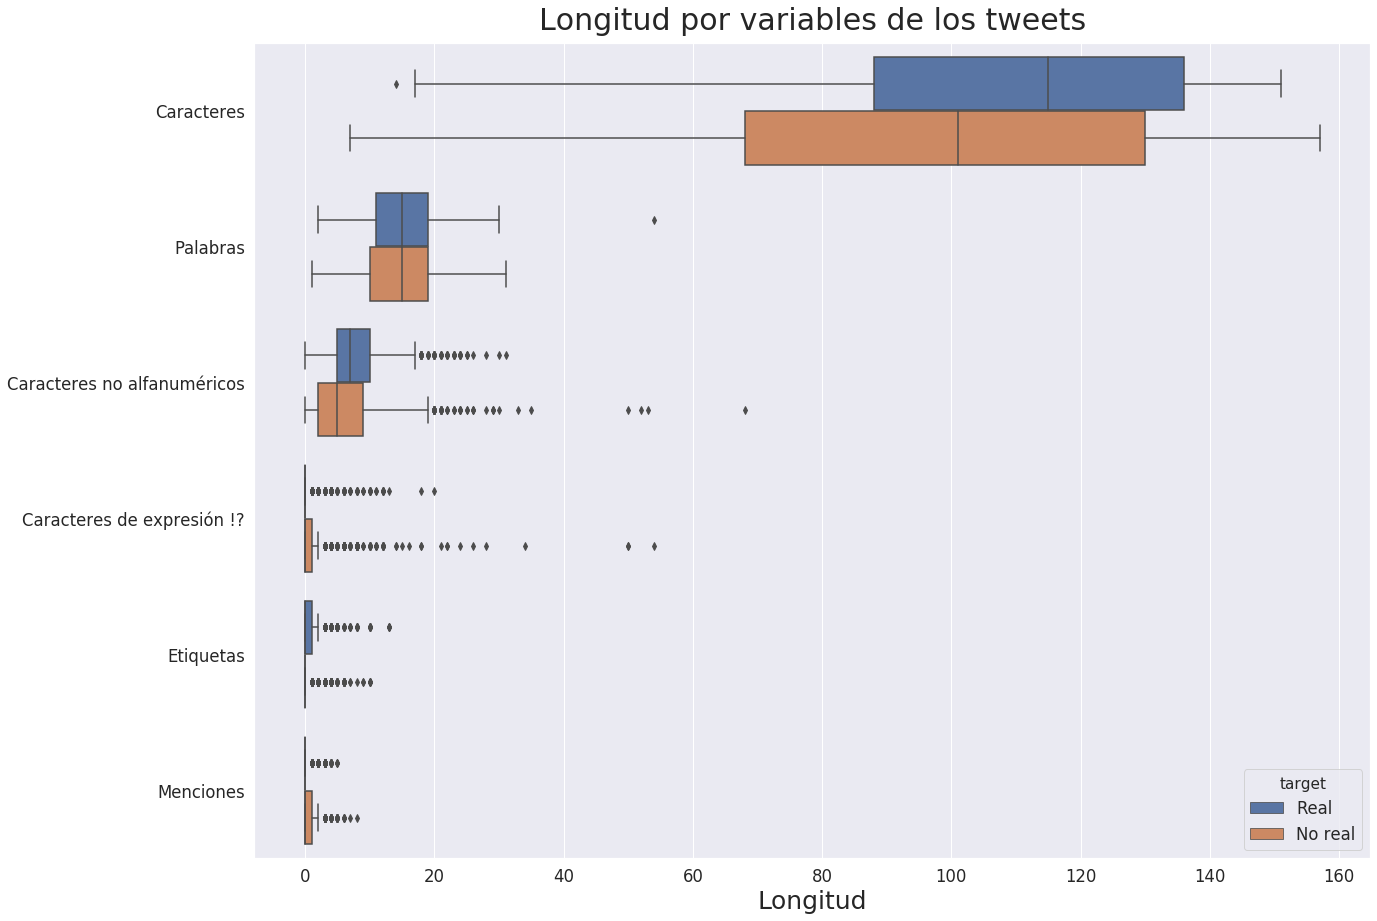

In [6]:
melted = pd.melt(finger, id_vars="target")
melted.loc[melted["target"] == 0, "target"] = "No real"
melted.loc[melted["target"] == 1, "target"] = "Real"
melted.rename(columns={"value":"Longitud","variable":"Variables"},inplace=True)
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=1.5)
plot = sns.boxplot(x='Longitud',y="Variables",data=melted,hue='target')
plot.axes.set_title('Longitud por variables de los tweets',fontsize=30, y=1.009)
plot.set_xlabel("Longitud",fontsize=25)
plot.set_ylabel("",fontsize=0)
#plot.get_figure().savefig("finger.png")

In [15]:
finger.loc[~finger['location'].isna(),'location'].value_counts()

USA                                              104
New York                                          71
United States                                     50
London                                            45
Canada                                            29
Nigeria                                           28
UK                                                27
Los Angeles, CA                                   26
India                                             24
Mumbai                                            22
Washington, DC                                    21
Kenya                                             20
Worldwide                                         19
Australia                                         18
Chicago, IL                                       18
California                                        17
California, USA                                   15
New York, NY                                      15
Everywhere                                    